In [1]:
from matplotlib import pyplot as plt
def plot_all(train_loss, val_loss, train_acc, val_acc, train_map, val_map, name):
    fig, axs = plt.subplots(6, dpi=100, figsize=(12, 16))

    #names = name.split("/")
    #name = names[3]

    best_val_acc = max(val_acc)
    best_train_acc = max(train_acc)

    best_val_loss = min(val_loss)
    best_train_loss = min(train_loss)

    best_val_map = max(val_map)
    best_train_map = max(train_map)

    epochs = len(train_acc)
    axs[0].set_title(f"Train Accuracies - Best: {best_train_acc}")
    axs[0].plot(train_acc, label=name)
    axs[0].set_ylim([0, 1])
    axs[0].set_xlim([0, epochs])
    axs[1].set_title(f"Val Accuracies - Best: {best_val_acc}")
    axs[1].plot(val_acc, label=name)
    axs[1].set_ylim([0, 1])
    axs[1].set_xlim([0, epochs])
    axs[2].set_title(f"Train Loss - Best: {best_train_loss}")
    axs[2].plot(train_loss, label=name)
    axs[2].set_ylim([min(train_loss), max(train_loss)])
    axs[2].set_xlim([0, epochs])
    axs[3].set_title(f"Val Loss - Best: {best_val_loss}")
    axs[3].plot(val_loss, label=name)
    axs[3].set_ylim([min(val_loss), max(val_loss)])
    axs[3].set_xlim([0, epochs])
    axs[4].set_title(f"Train Map - Best: {best_train_map}")
    axs[4].plot(train_map, label=name)
    axs[4].set_ylim([0, 1])
    axs[4].set_xlim([0, epochs])
    axs[5].set_title(f"Val Map - Best: {best_val_map}")
    axs[5].plot(val_map, label=name)
    axs[5].set_ylim([0, 1])
    axs[5].set_xlim([0, epochs])

    #axs[0].set_title('My Title', fontdict={'fontsize': 20, 'fontweight': 'medium'})


    axs[0].legend(loc="lower right", fontsize="small")
    axs[1].legend(loc="lower right", fontsize="small")
    axs[2].legend(loc="lower right", fontsize="small")
    axs[3].legend(loc="lower right", fontsize="small")
    axs[4].legend(loc="lower right", fontsize="small")
    axs[5].legend(loc="lower right", fontsize="small")

    fig.suptitle(name, fontsize=16)
    fig.tight_layout()
    #fig.savefig(f"./figures/pngs/{names[-1]}.png")

In [2]:
from matplotlib import pyplot as plt
def plot_all_2(histories, title):
    fig, axs = plt.subplots(6, dpi=300, figsize=(10, 16))
    max_epoch = 0
    best_values = {}
    max_y_values = {}
    best_values['best_val_acc'] = 0
    best_values['best_train_acc'] = 0
    best_values['best_val_loss'] = 1000
    best_values['best_train_loss'] = 1000
    best_values['best_val_map'] = 0
    best_values['best_train_map'] = 0
    max_y_values['max_y_acc'] = 1
    max_y_values['max_y_loss'] = 1
    max_y_values['max_y_map'] = 1

    for name, history in histories.items():
        train_loss = history['train_loss']
        val_loss = history['val_loss']
        train_acc = history['train_acc']
        val_acc = history['val_acc']
        train_map = history['train_map']
        val_map = history['val_map']
        name = name

        if len(train_acc) > max_epoch: max_epoch = len(train_acc)

        if max(val_acc) > best_values['best_val_acc']: best_values['best_val_acc'] = max(val_acc)
        if max(train_acc) > best_values['best_train_acc']: best_values['best_train_acc'] = max(train_acc)
        if min(val_loss) < best_values['best_val_loss']: best_values['best_val_loss'] = min(val_loss)
        if min(train_loss) < best_values['best_train_loss']: best_values['best_train_loss'] = min(train_loss)
        if max(val_map) > best_values['best_val_map']: best_values['best_val_map'] = max(val_map)
        if max(train_map) > best_values['best_train_map']: best_values['best_train_map'] = max(train_map)

        if max(val_acc) > max_y_values['max_y_acc']: max_y_values['max_y_acc'] = max(val_acc)
        if max(train_acc) > max_y_values['max_y_acc']: max_y_values['max_y_acc'] = max(train_acc)
        if max(val_loss) > max_y_values['max_y_loss']: max_y_values['max_y_loss'] = max(val_loss)
        if max(train_loss) > max_y_values['max_y_loss']: max_y_values['max_y_loss'] = max(train_loss)
        if max(val_map) > max_y_values['max_y_map']: max_y_values['max_y_map'] = max(val_map)
        if max(train_map) > max_y_values['max_y_map']: max_y_values['max_y_map'] = max(train_map)
        
        axs[0].plot(train_acc, label=name)
        axs[0].set_ylim([0, max_y_values['max_y_acc']])
        axs[1].plot(val_acc, label=name)
        axs[1].set_ylim([0, max_y_values['max_y_acc']])
        axs[2].plot(train_loss, label=name)
        axs[2].set_ylim([0, max_y_values['max_y_loss']])
        axs[3].plot(val_loss, label=name)
        axs[3].set_ylim([0, max_y_values['max_y_loss']])
        axs[4].plot(train_map, label=name)
        axs[4].set_ylim([0, max_y_values['max_y_map']])
        axs[5].plot(val_map, label=name)
        axs[5].set_ylim([0, max_y_values['max_y_map']])
        #axs[0].set_title('My Title', fontdict={'fontsize': 20, 'fontweight': 'medium'})

    axs[0].set_xlim([0, max_epoch])
    axs[1].set_xlim([0, max_epoch])
    axs[2].set_xlim([0, max_epoch])
    axs[3].set_xlim([0, max_epoch])
    axs[4].set_xlim([0, max_epoch])
    axs[5].set_xlim([0, max_epoch])

    axs[0].set_title(f"Train Accuracies - Best: {best_values['best_train_acc']}")
    axs[1].set_title(f"Val Accuracies - Best: {best_values['best_val_acc']}")
    axs[2].set_title(f"Train Loss - Best: {best_values['best_train_loss']}")
    axs[3].set_title(f"Val Loss - Best: {best_values['best_val_loss']}")
    axs[4].set_title(f"Train Map - Best: {best_values['best_train_map']}")
    axs[5].set_title(f"Val Map - Best: {best_values['best_val_map']}")
    
    legend_location = "lower left"

    axs[0].legend(loc=legend_location, fontsize="small")
    axs[1].legend(loc=legend_location, fontsize="small")
    axs[2].legend(loc=legend_location, fontsize="small")
    axs[3].legend(loc=legend_location, fontsize="small")
    axs[4].legend(loc=legend_location, fontsize="small")
    axs[5].legend(loc=legend_location, fontsize="small")

    fig.suptitle(title, fontsize=16)
    fig.tight_layout()
    #fig.savefig(f"./figures/pngs/{names[-1]}.png")

In [24]:
import math
def plot_all_3(histories, title):
    fig1, axs1 = plt.subplots(2, dpi=100, figsize=(12, 10))
    fig2, axs2 = plt.subplots(2, dpi=100, figsize=(12, 10))
    fig3, axs3 = plt.subplots(2, dpi=100, figsize=(12, 10))
    max_epoch = 0
    best_values = {}
    max_y_values = {}
    best_values['best_val_acc'] = 0
    best_values['best_train_acc'] = 0
    best_values['best_val_loss'] = 1000
    best_values['best_train_loss'] = 1000
    best_values['best_val_map'] = 0
    best_values['best_train_map'] = 0
    max_y_values['max_y_acc'] = 1
    max_y_values['max_y_loss'] = 1
    max_y_values['max_y_map'] = 1

    for name, history in histories.items():
        train_loss = history['train_loss']
        val_loss = history['val_loss']
        train_acc = history['train_acc']
        val_acc = history['val_acc']
        train_map = history['train_map']
        val_map = history['val_map']
        name = name

        if len(train_acc) > max_epoch: max_epoch = len(train_acc)

        if max(val_acc) > best_values['best_val_acc']: best_values['best_val_acc'] = max(val_acc)
        if max(train_acc) > best_values['best_train_acc']: best_values['best_train_acc'] = max(train_acc)
        if min(val_loss) < best_values['best_val_loss']: best_values['best_val_loss'] = min(val_loss)
        if min(train_loss) < best_values['best_train_loss']: best_values['best_train_loss'] = min(train_loss)
        if max(val_map) > best_values['best_val_map']: best_values['best_val_map'] = max(val_map)
        if max(train_map) > best_values['best_train_map']: best_values['best_train_map'] = max(train_map)

        if max(val_acc) > max_y_values['max_y_acc']: max_y_values['max_y_acc'] = max(val_acc)
        if max(train_acc) > max_y_values['max_y_acc']: max_y_values['max_y_acc'] = max(train_acc)
        if max(val_loss) > max_y_values['max_y_loss']: max_y_values['max_y_loss'] = max(val_loss)
        if max(train_loss) > max_y_values['max_y_loss']: max_y_values['max_y_loss'] = max(train_loss)
        if max(val_map) > max_y_values['max_y_map']: max_y_values['max_y_map'] = max(val_map)
        if max(train_map) > max_y_values['max_y_map']: max_y_values['max_y_map'] = max(train_map)
        
        axs1[0].plot(train_acc, label=name)
        axs1[0].set_ylim([0, max_y_values['max_y_acc']])
        axs1[1].plot(val_acc, label=name)
        axs1[1].set_ylim([0, max_y_values['max_y_acc']])
        axs2[0].plot(train_loss, label=name)
        axs2[0].set_ylim([0, max_y_values['max_y_loss']])
        axs2[1].plot(val_loss, label=name)
        axs2[1].set_ylim([0, max_y_values['max_y_loss']])
        axs3[0].plot(train_map, label=name)
        axs3[0].set_ylim([0, max_y_values['max_y_map']])
        axs3[1].plot(val_map, label=name)
        axs3[1].set_ylim([0, max_y_values['max_y_map']])

    axs1[0].set_xlim([0, max_epoch])
    axs1[1].set_xlim([0, max_epoch])
    axs2[0].set_xlim([0, max_epoch])
    axs2[1].set_xlim([0, max_epoch])
    axs3[0].set_xlim([0, max_epoch])
    axs3[1].set_xlim([0, max_epoch])

    axs1[0].set_title(f"Train Accuracies - Best: {round(best_values['best_train_acc'],2)}")
    axs1[1].set_title(f"Val Accuracies - Best: {round(best_values['best_val_acc'],2)}")
    axs2[0].set_title(f"Train Loss - Best: {round(best_values['best_train_loss'],2)}")
    axs2[1].set_title(f"Val Loss - Best: {round(best_values['best_val_loss'],2)}")
    axs3[0].set_title(f"Train Map - Best: {str(round(best_values['best_train_map'],2))}")
    axs3[1].set_title(f"Val Map - Best: {str(round(best_values['best_val_map'],2))}")

    axs1[0].set_xlabel("Epochs")
    axs1[1].set_xlabel("Epochs")
    axs2[0].set_xlabel("Epochs")
    axs2[1].set_xlabel("Epochs")
    axs3[0].set_xlabel("Epochs")
    axs3[1].set_xlabel("Epochs")

    axs1[0].set_ylabel("Accuracy")
    axs1[1].set_ylabel("Accuracy")
    axs2[0].set_ylabel("Loss")
    axs2[1].set_ylabel("Loss")
    axs3[0].set_ylabel("Map")
    axs3[1].set_ylabel("Map")
    
    legend_location = "upper left"

    axs1[0].legend(loc=legend_location, fontsize="small", prop={'size': 12})
    axs1[1].legend(loc=legend_location, fontsize="small", prop={'size': 12})
    axs2[0].legend(loc=legend_location, fontsize="small", prop={'size': 12})
    axs2[1].legend(loc=legend_location, fontsize="small", prop={'size': 12})
    axs3[0].legend(loc=legend_location, fontsize="small", prop={'size': 12})
    axs3[1].legend(loc=legend_location, fontsize="small", prop={'size': 12})

    fig1.suptitle(title, fontsize=14)
    fig1.tight_layout()
    fig2.suptitle(title, fontsize=14)
    fig2.tight_layout()
    fig3.suptitle(title, fontsize=14)
    fig3.tight_layout()
    #fig.savefig(f"./figures/pngs/{names[-1]}.png")

In [13]:
import os
from utils import load_pickle, create_dir_if_not_exists
import torch

def process_history(history):
    history['train_loss'] = list(torch.tensor(history['train_loss'], device = 'cpu').numpy())
    history['val_loss'] = list(torch.tensor(history['val_loss'], device = 'cpu').numpy())
    history['train_acc'] = list(torch.tensor(history['train_acc'], device = 'cpu').numpy())
    history['val_acc'] = list(torch.tensor(history['val_acc'], device = 'cpu').numpy())
    history['train_map'] = list(torch.tensor(history['train_map'], device = 'cpu').numpy())
    history['val_map'] = list(torch.tensor(history['val_map'], device = 'cpu').numpy())
    return history

def get_histories(directory):
    histories = {}
    for x in os.walk(directory):
        if x[0] == directory: continue
        sub_dir = str(x[0])
        try:
            history_dir = sub_dir + "/" + str(x[2][0])
            history = load_pickle(history_dir)
            history = process_history(history)
            histories[sub_dir] = history
        except:
            pass
    
#create_dir_if_not_exists("./figures/pngs/")

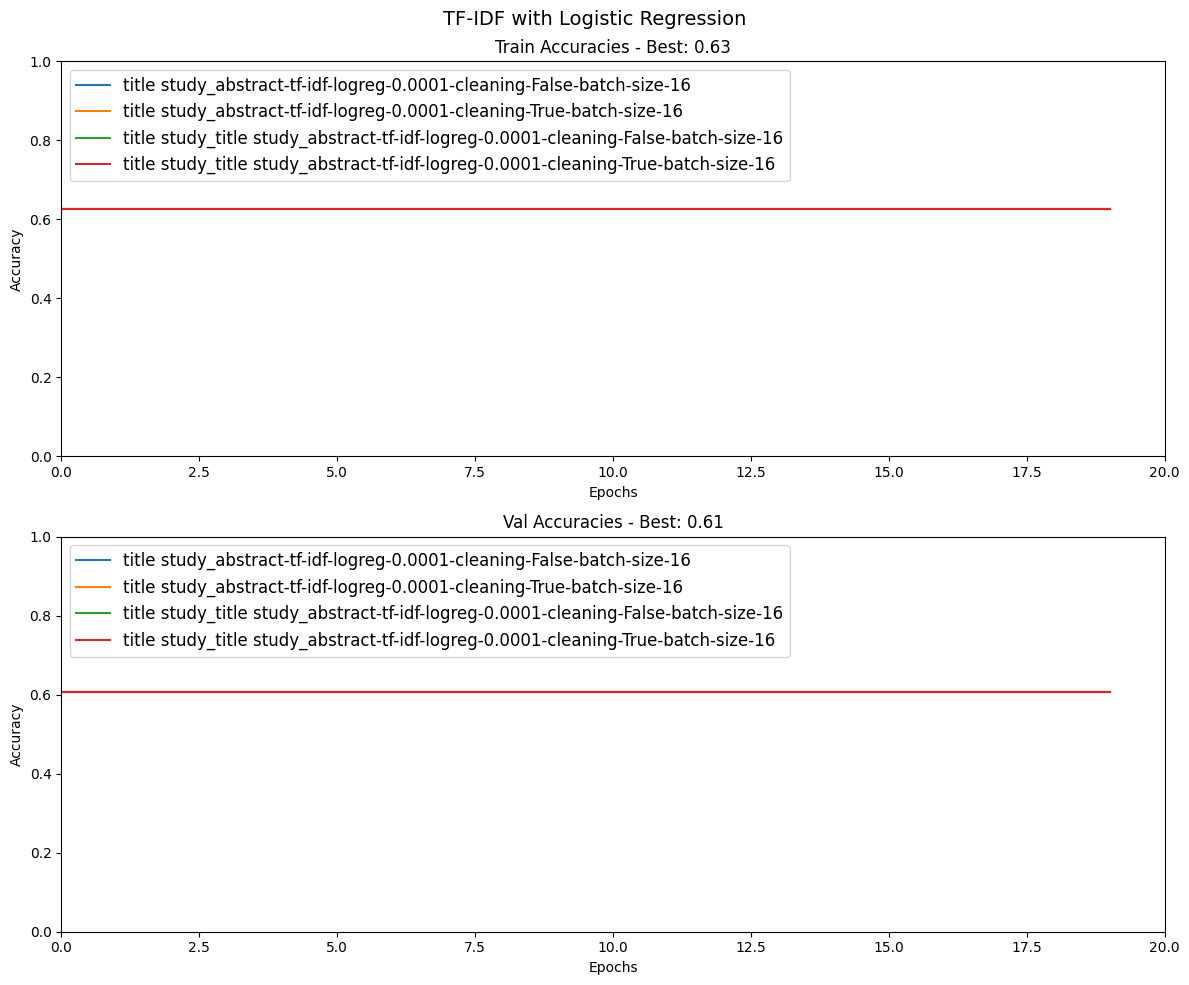

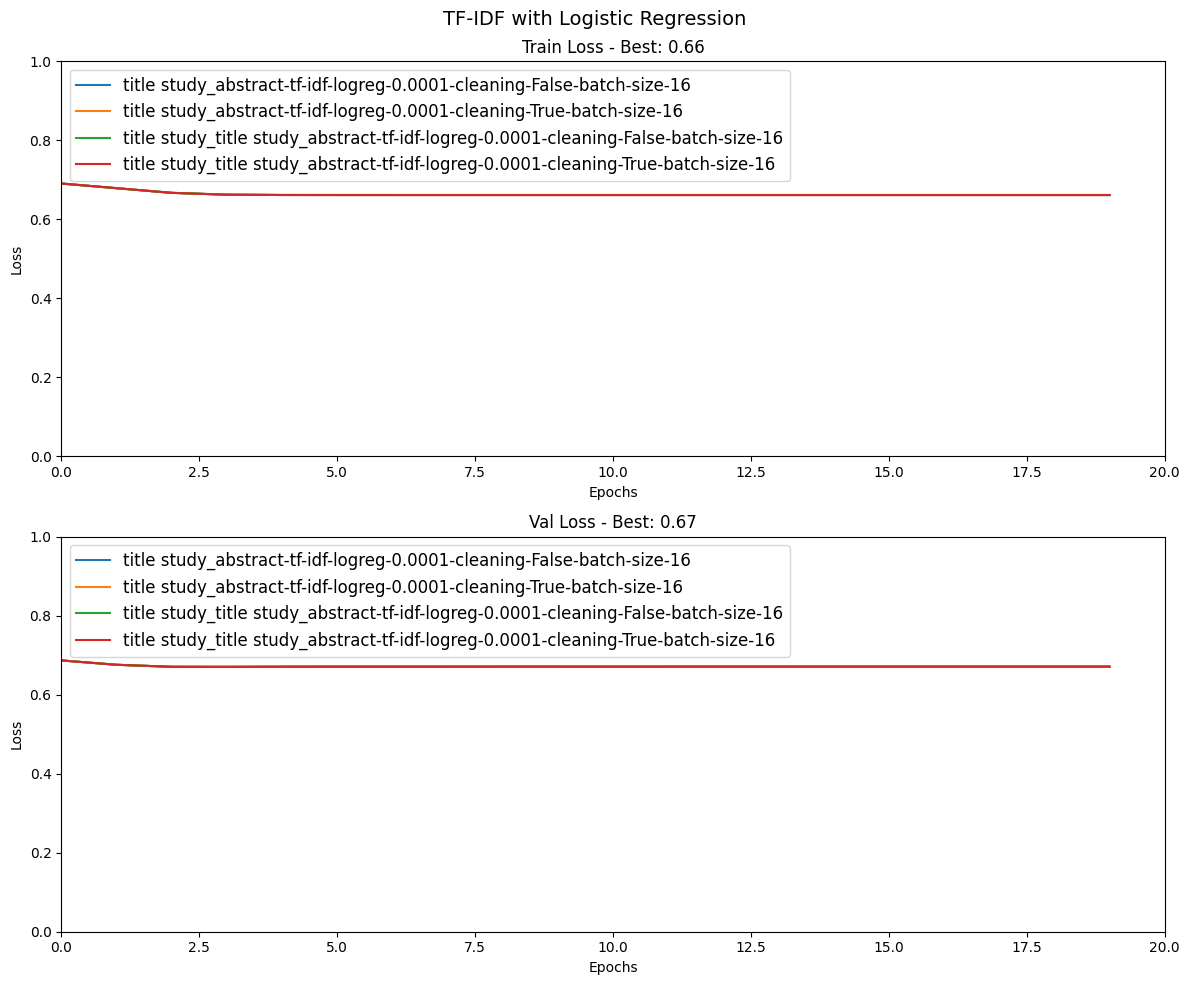

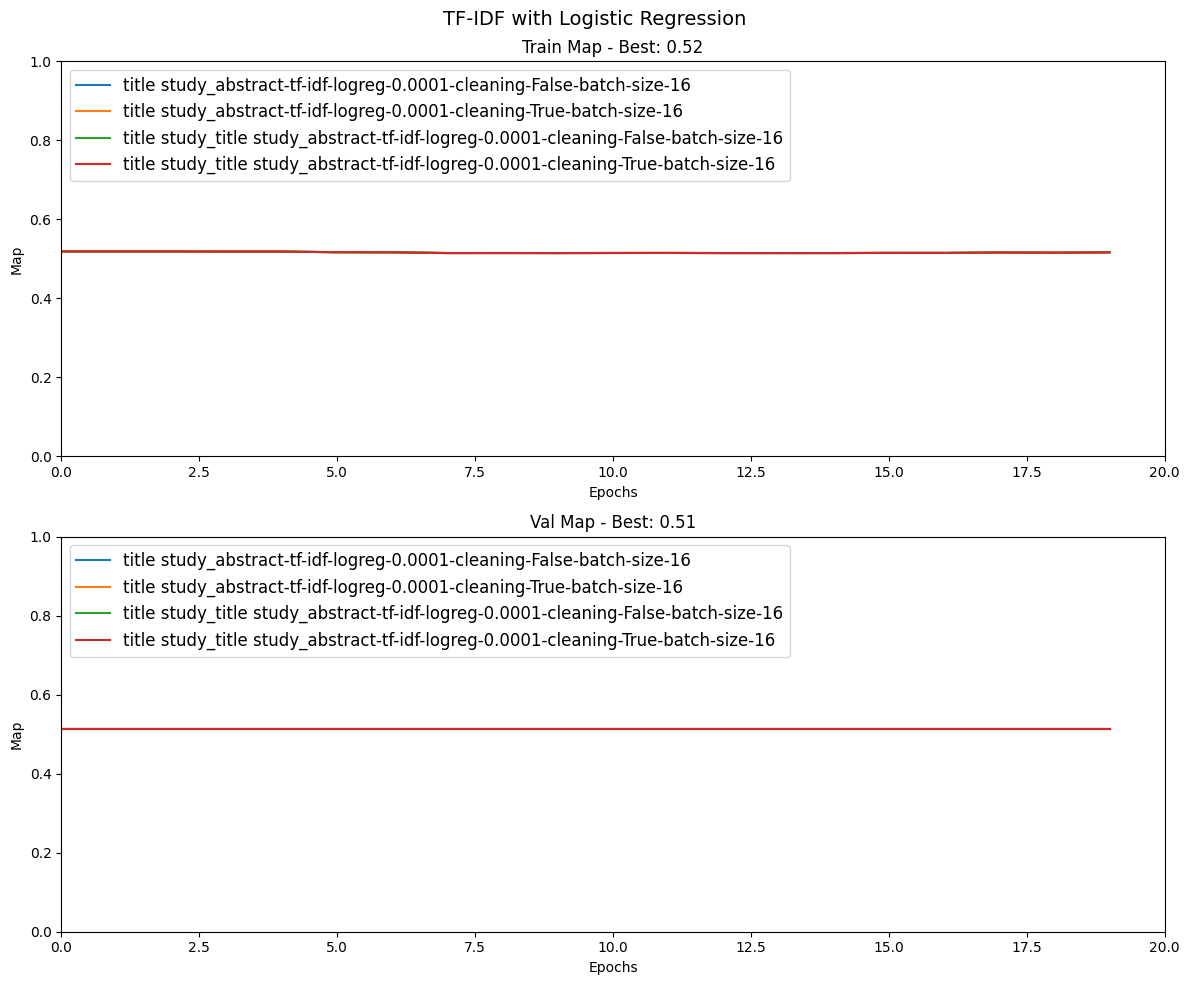

In [25]:
def plot_all_2_dict(directories, plot_name):
    histories = {}
    for directory in directories:
        for x in os.walk(directory):
            if x[0] == directory: continue
            sub_dir = str(x[0])
            try:
                history_dir = sub_dir + "/" + str(x[2][0])
                history = load_pickle(history_dir)
                history = process_history(history)

                if "/" in sub_dir:
                    name_splits = sub_dir.split("/")
                    name = name_splits[-1]
                else:
                    name = sub_dir
                histories[name] = history
            except:
                pass
    plot_all_3(histories, plot_name)

plot_all_2_dict(["./history/approach1/"], "TF-IDF with Logistic Regression")

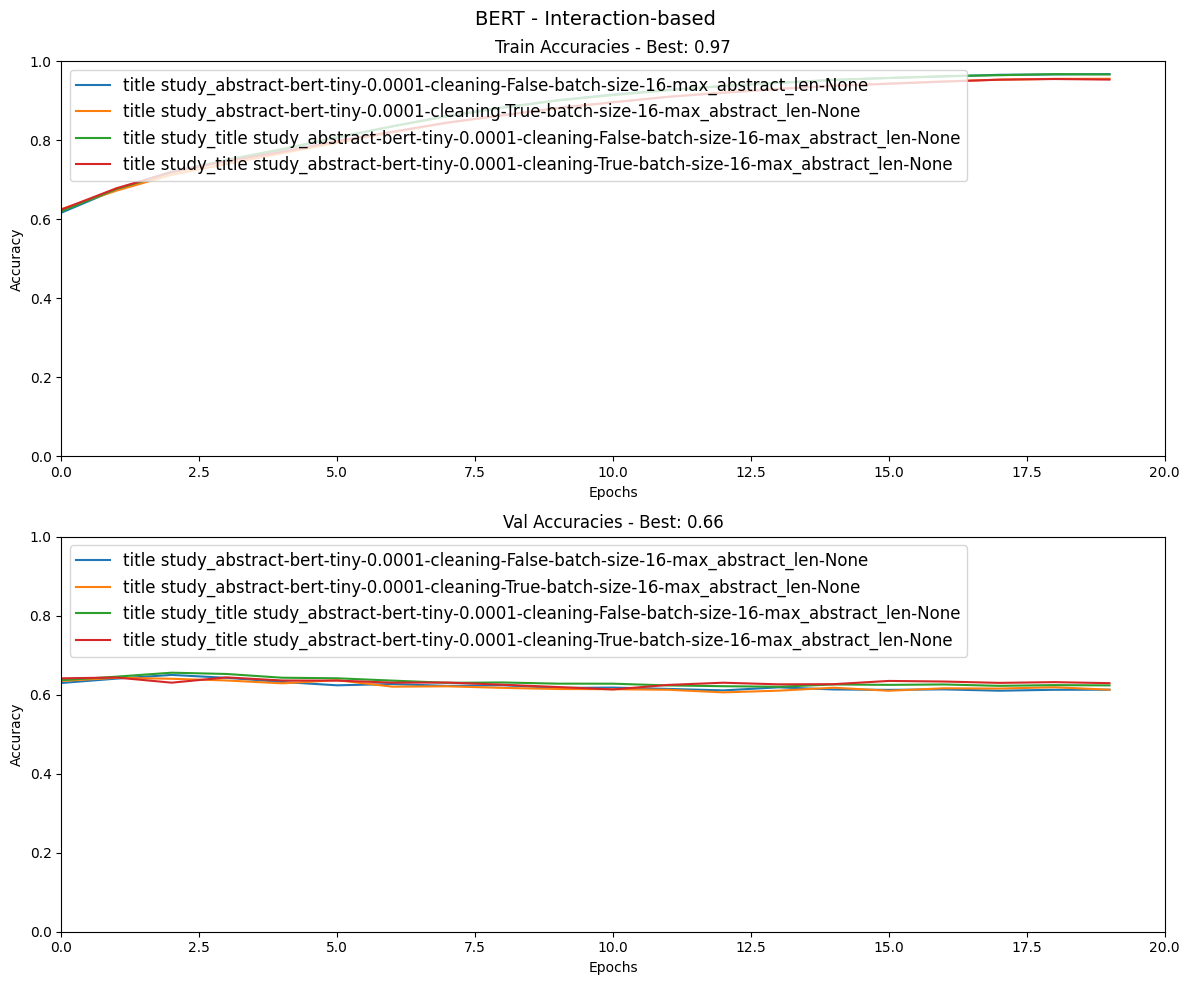

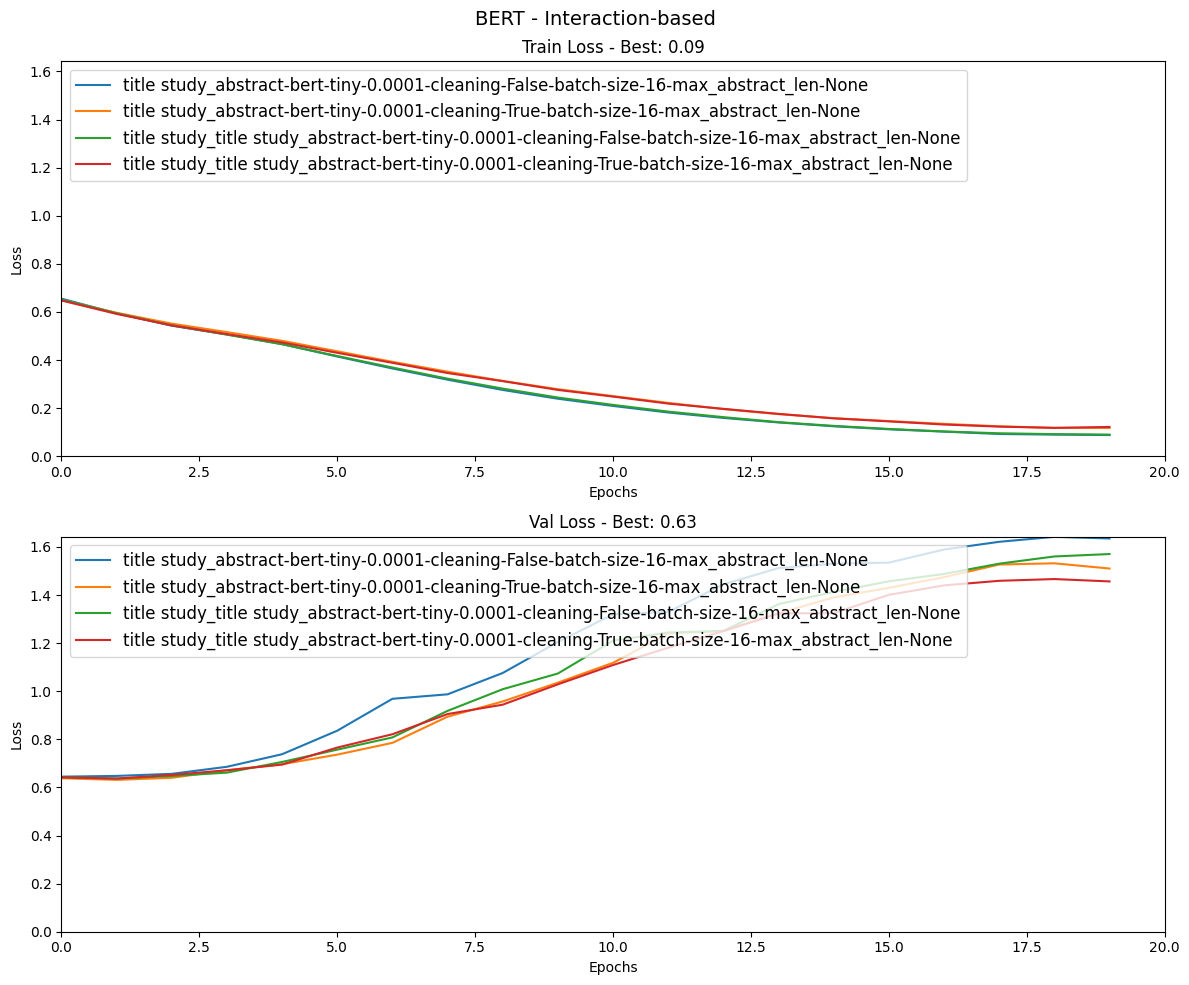

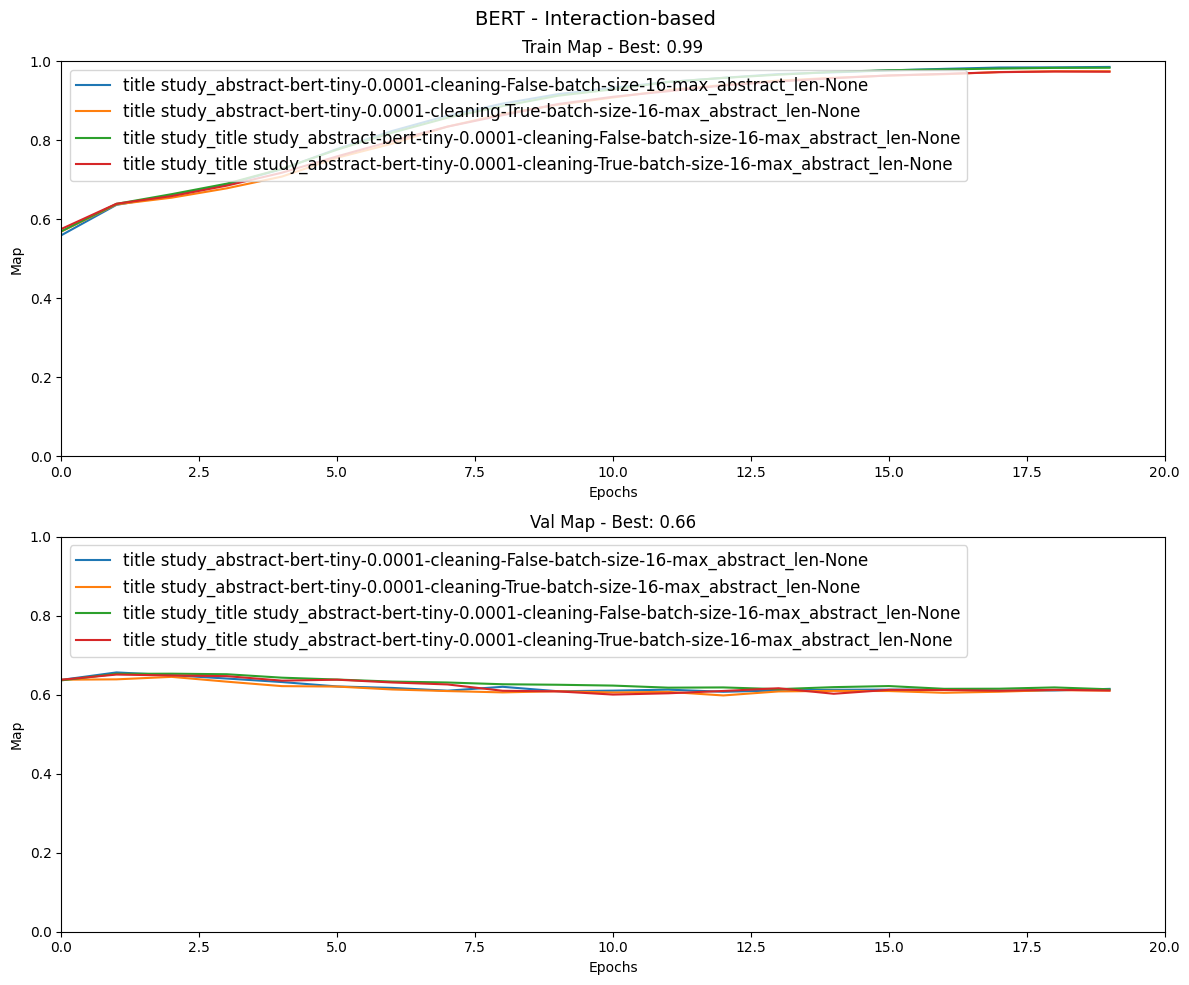

In [26]:
plot_all_2_dict(["./history/approach2/"], "BERT - Interaction-based")

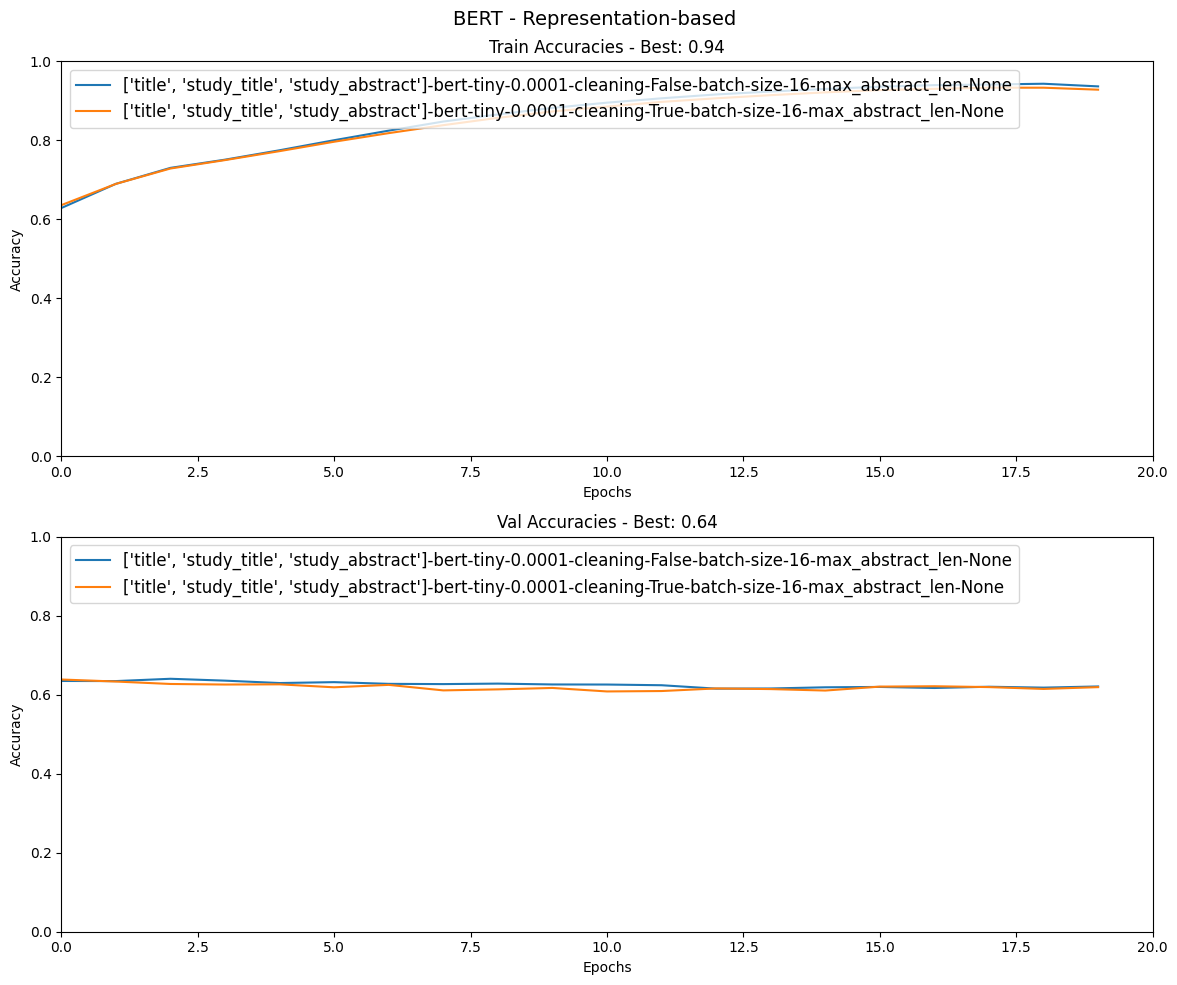

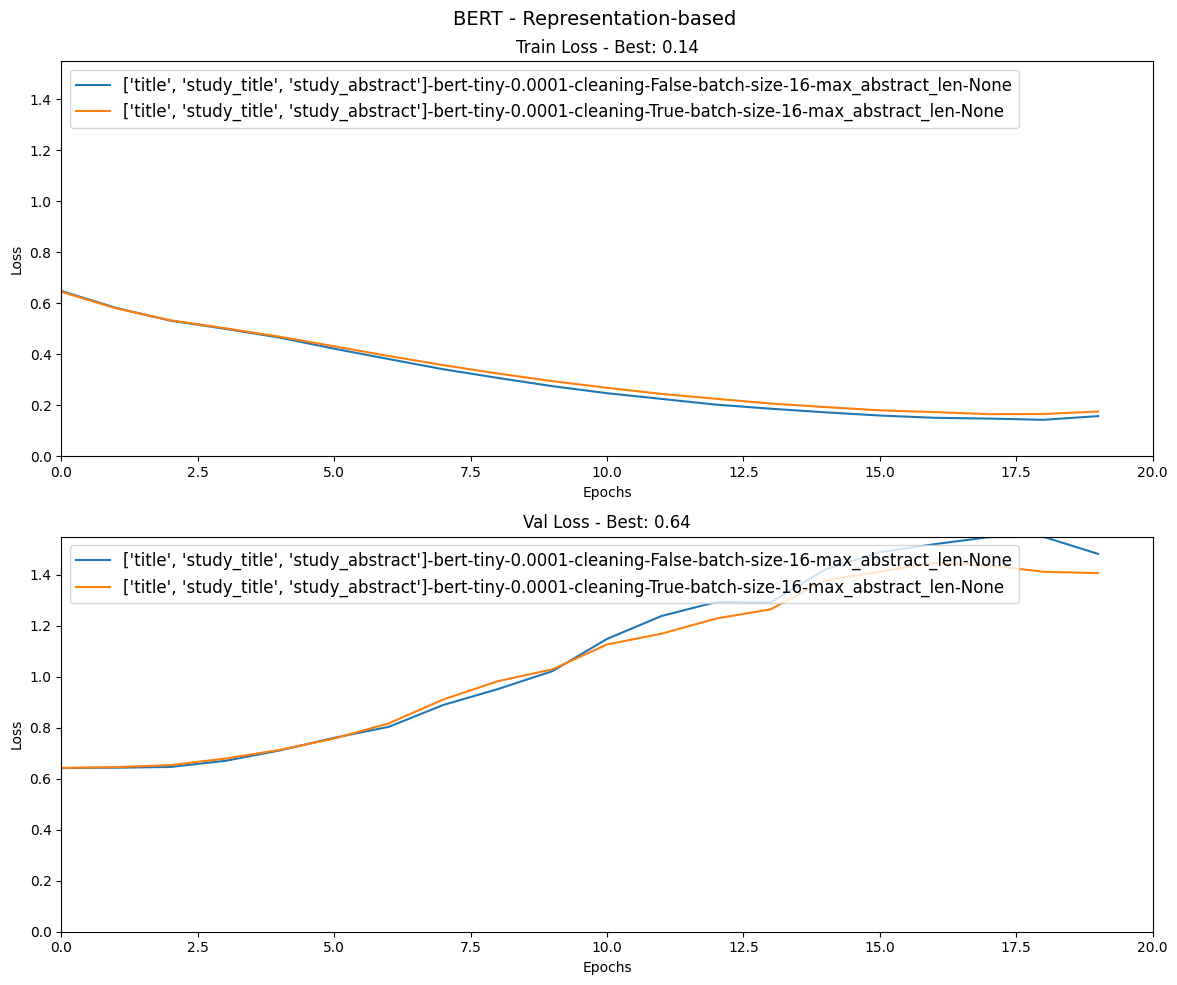

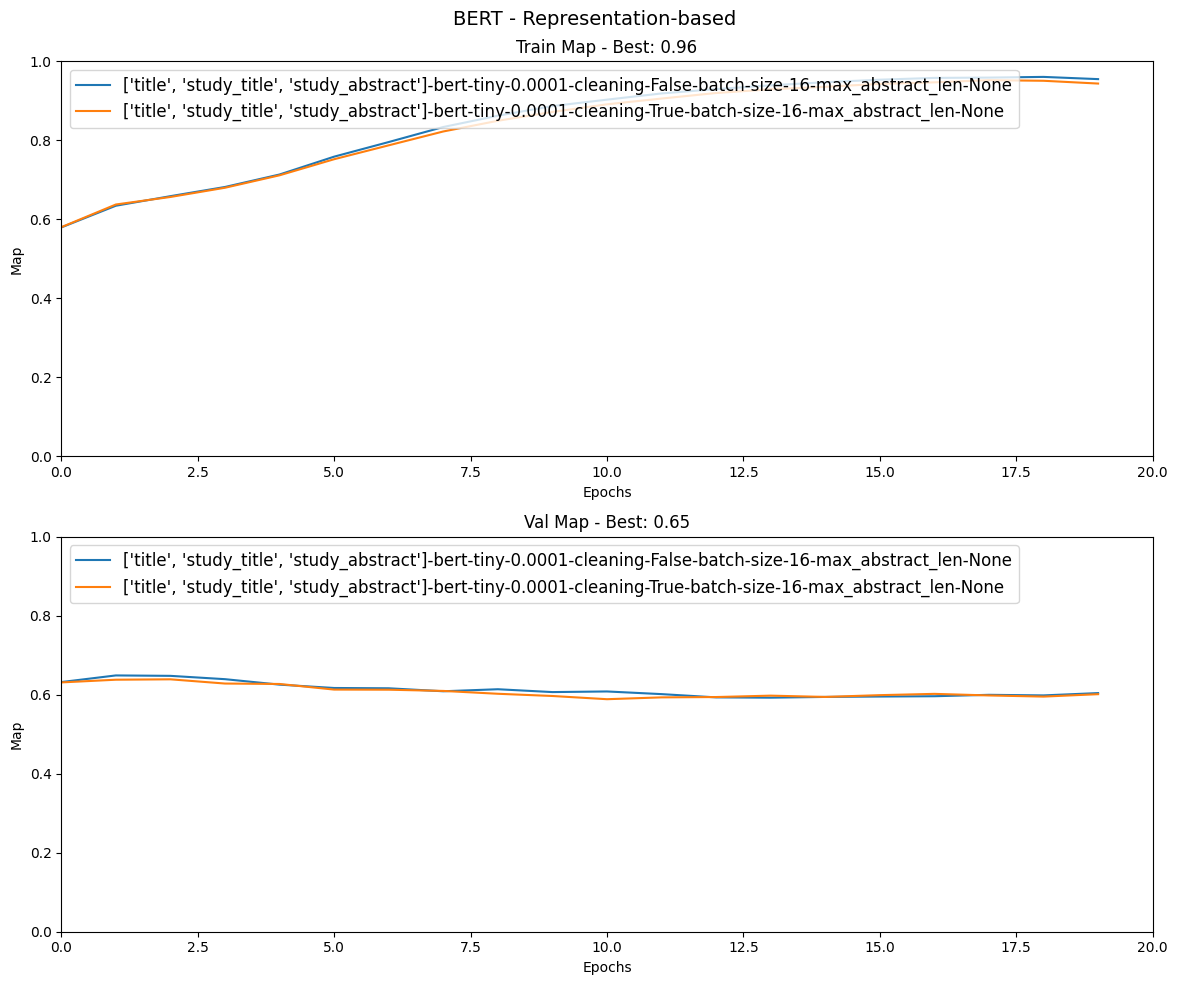

In [27]:
plot_all_2_dict(["./history/approach3/"], "BERT - Representation-based")

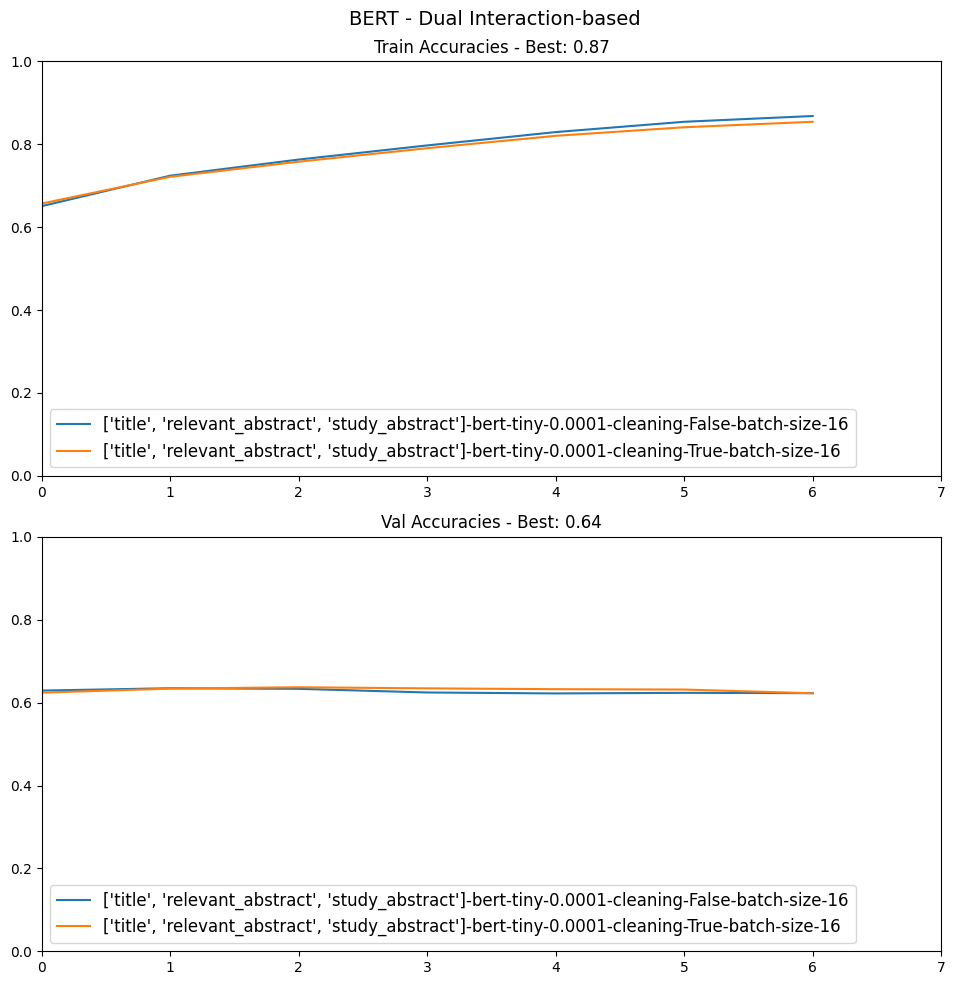

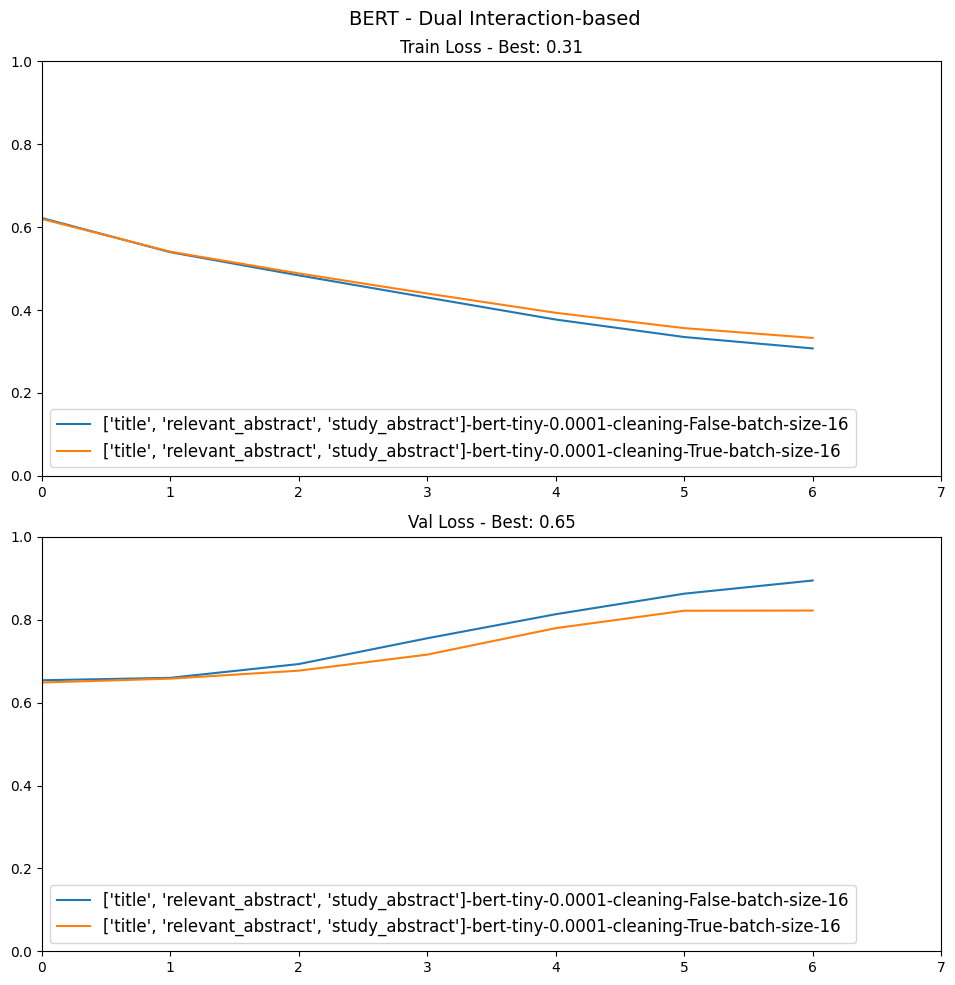

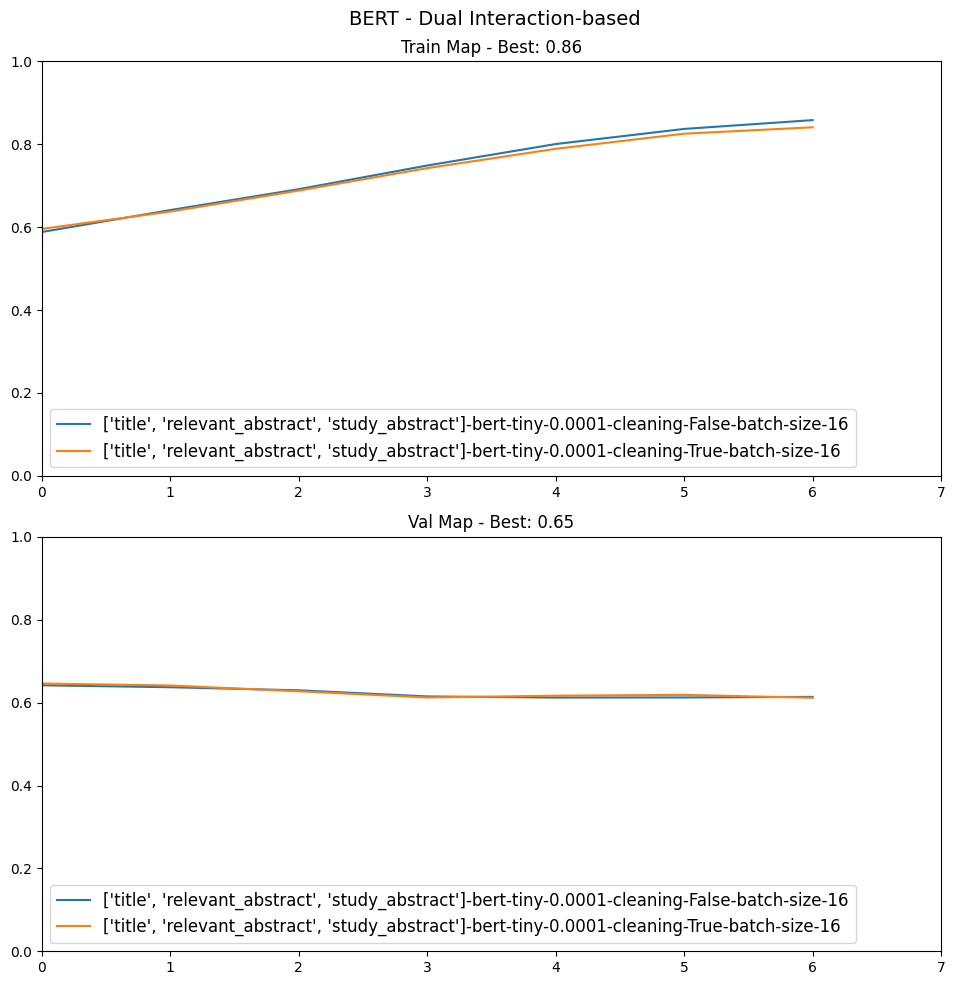

In [8]:
plot_all_2_dict(["./history/approach6/"], "BERT - Dual Interaction-based")

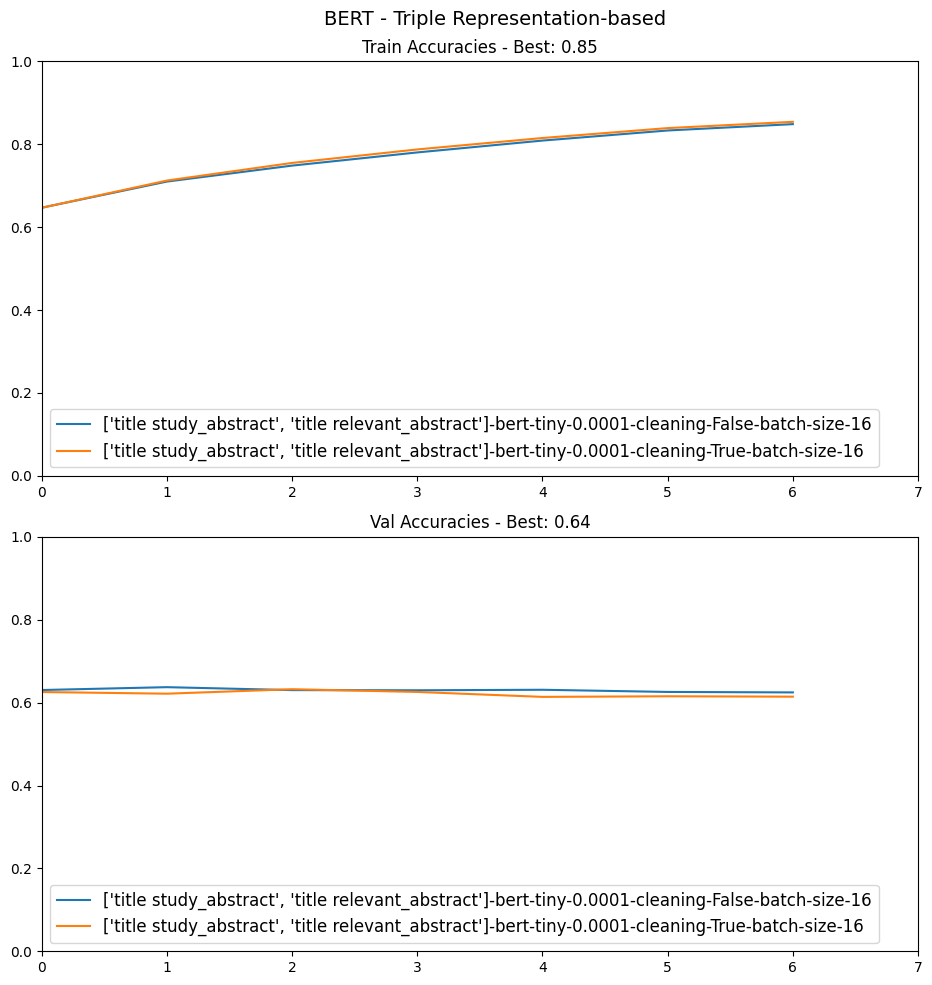

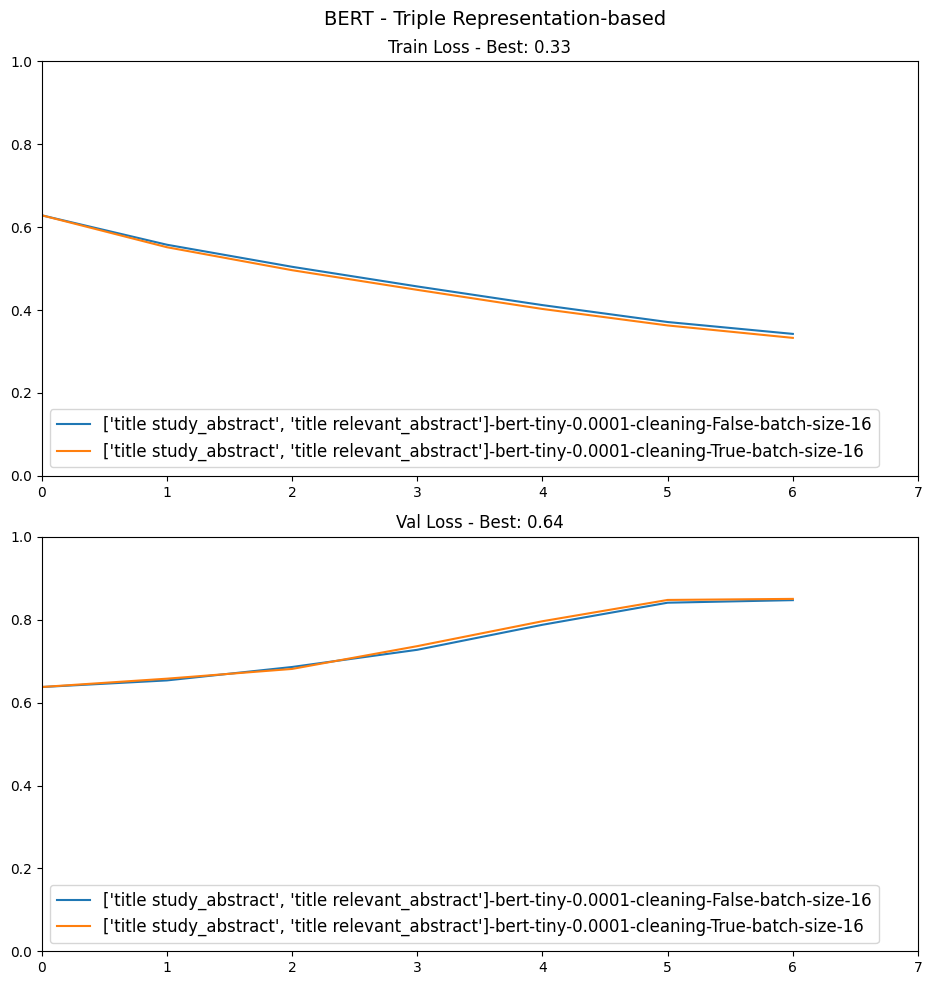

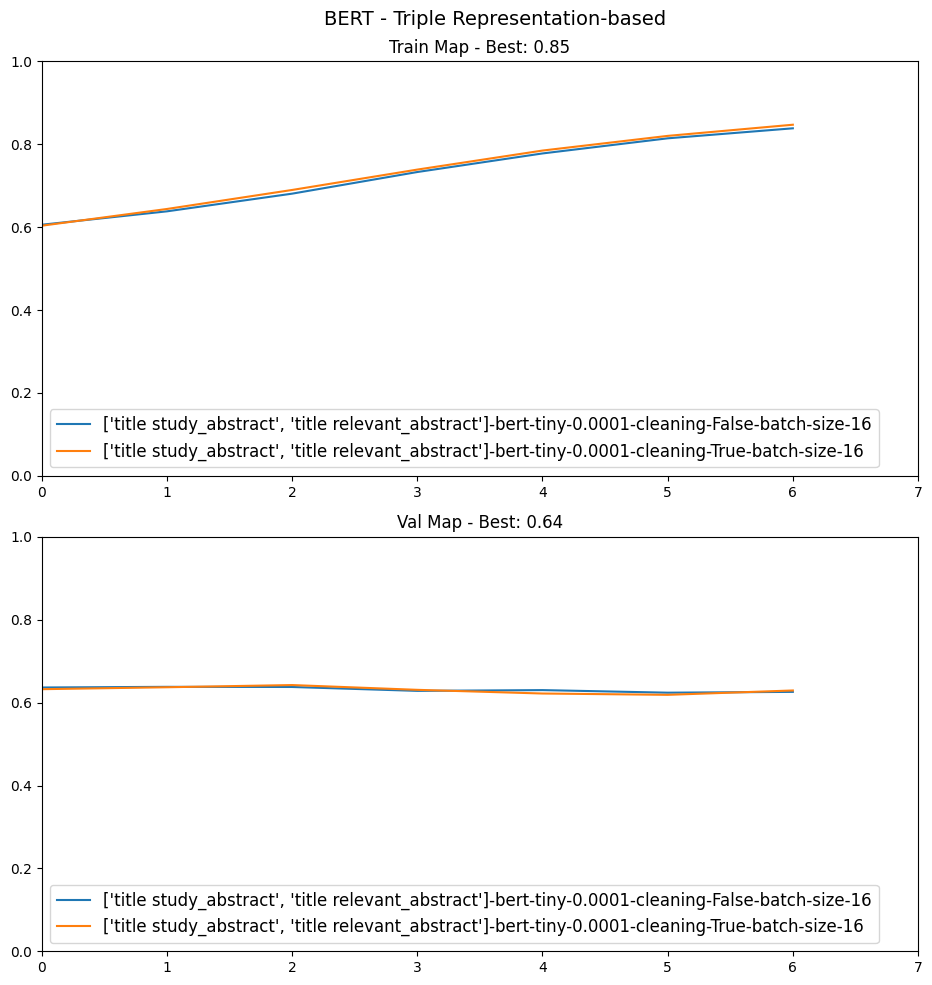

In [9]:
#plot_all_2_dict(["./history/approach5/"], "Deep Relevance Matching Model")
plot_all_2_dict(["./history/approach62/"], "BERT - Triple Representation-based")